In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'analysis_df.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

In [3]:
print(df.head())

       File Name  Total Faces  Curved Faces  Total Edges  Vertices  \
0  00509603.step           82            21          484       968   
1  00009985.step          894           749         4279      8558   
2  00509983.step           30            20          146       292   
3  00009776.step            6             2           24        48   
4  00509729.step           12             7           58       116   

   Bounding Box Volume  Mean Curvature  Curvature Std Dev         Volume  \
0        200475.002187       -0.011987           0.027144   66365.469420   
1         18634.699104       -1.481930           1.133369    5341.733194   
2        591300.822290       -0.157138           0.173963  199718.096188   
3         19648.376922        0.000278           0.000616     989.141860   
4        331250.003150       -0.018965           0.018671  157478.901835   

   Hole Count  
0          21  
1         295  
2          14  
3           0  
4           4  


In [4]:
df.describe()

,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count
count,64.000000,64.000000,64.000000,64.000000,6.400000e+01,63.000000,63.000000,64.000000,64.000000
mean,142.890625,54.671875,758.531250,1517.062500,2.486945e+05,-0.123214,0.182560,60826.173329,29.078125
std,455.423756,115.876652,2389.080888,4778.161777,5.313386e+05,0.221035,0.221212,153258.018441,48.813641
min,0.000000,0.000000,1.000000,2.000000,8.012551e+01,-1.481930,0.000000,0.000000,0.000000
25%,23.500000,6.750000,106.500000,213.000000,9.804431e+03,-0.128515,0.056456,3534.577032,4.000000
50%,40.000000,16.500000,231.000000,462.000000,3.155903e+04,-0.076860,0.114038,8657.040529,12.000000
75%,106.500000,48.750000,578.250000,1156.500000,1.286658e+05,-0.024515,0.197882,38018.790179,29.750000
max,3557.000000,749.000000,18780.000000,37560.000000,2.611564e+06,0.126636,1.133369,966928.738586,295.000000


In [17]:
# Define criteria function to count how many criteria are met
def criteria_count(row):
    criteria = [
        1 <= row["Total Faces"] <= 150,
        2 <= row["Curved Faces"] <= 50,
        1 <= row["Total Edges"] <= 1500,
        1 <= row["Vertices"] <= 2500,
        row["Bounding Box Volume"] < 0.2e6,
        0 > row["Mean Curvature"] >= -0.15,
        0 < row["Curvature Std Dev"] <= 0.2,
        1e5 <= row["Volume"] < 0.13e6,
        5 <= row["Hole Count"] < 50
    ]
    return sum(criteria)  # Count how many criteria are True

# Load the file into a pandas DataFrame
try:
    # Replace 'file_path' with the path to your data file
    data = pd.read_csv(file_path)  # Adjust if file is not CSV (e.g., pd.read_excel for Excel files)
    
    # Add a column to count how many criteria are met for each row
    data['Criteria Met'] = data.apply(criteria_count, axis=1)
    
    # Filter rows meeting at least 6 criteria
    filtered_data = data[data['Criteria Met'] >= 7]
    
    # Check if any rows meet the criteria and print their 'File Name'
    if not filtered_data.empty:
        print(f"Rows meeting at least 6 criteria:")
        print(filtered_data[['File Name', 'Criteria Met']])  # Adjust column names if different
    else:
        print(f"No rows in the file '{file_path}' meet at least 6 criteria.")

except Exception as e:
    print(f"Error processing the file: {e}")


Rows meeting at least 6 criteria:
        File Name  Criteria Met
0   00509603.step             7
5   00509444.step             8
6   00009783.step             8
11  00509520.step             8
12  00009867.step             8
13  00509817.step             7
14  00009889.step             8
18  00009891.step             8
19  00509447.step             7
20  00009939.step             8
21  00509583.step             7
25  00509765.step             7
27  00009913.step             7
28  00009872.step             8
29  00009964.step             8
32  00009764.step             7
33  00509850.step             8
35  00009902.step             7
36  00509609.step             7
39  00009866.step             7
40  00009910.step             8
41  00009940.step             8
44  00509846.step             8
45  00509712.step             7
47  00509855.step             8
48  00009868.step             8
49  00009869.step             7
50  00509854.step             7
51  00009813.step             8
54  00

In [18]:
filtered_data.describe()

,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count,Criteria Met
count,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.00000
mean,45.485714,16.514286,257.257143,514.514286,1.151952e+05,-0.064448,0.100373,28924.820540,13.314286,7.60000
std,33.158595,13.162718,199.395608,398.791216,2.739444e+05,0.040237,0.049755,61370.787577,10.110482,0.49705
min,4.000000,2.000000,12.000000,24.000000,8.012551e+01,-0.167005,0.025419,46.938252,2.000000,7.00000
25%,25.000000,7.500000,135.000000,270.000000,8.783500e+03,-0.093013,0.056456,3944.839035,6.000000,7.00000
50%,36.000000,14.000000,204.000000,408.000000,2.344390e+04,-0.063409,0.109541,9319.390707,12.000000,8.00000
75%,59.500000,19.500000,317.000000,634.000000,1.036271e+05,-0.027751,0.129692,27416.709632,16.000000,8.00000
max,152.000000,63.000000,898.000000,1796.000000,1.476944e+06,-0.011987,0.213936,356655.849134,41.000000,8.00000


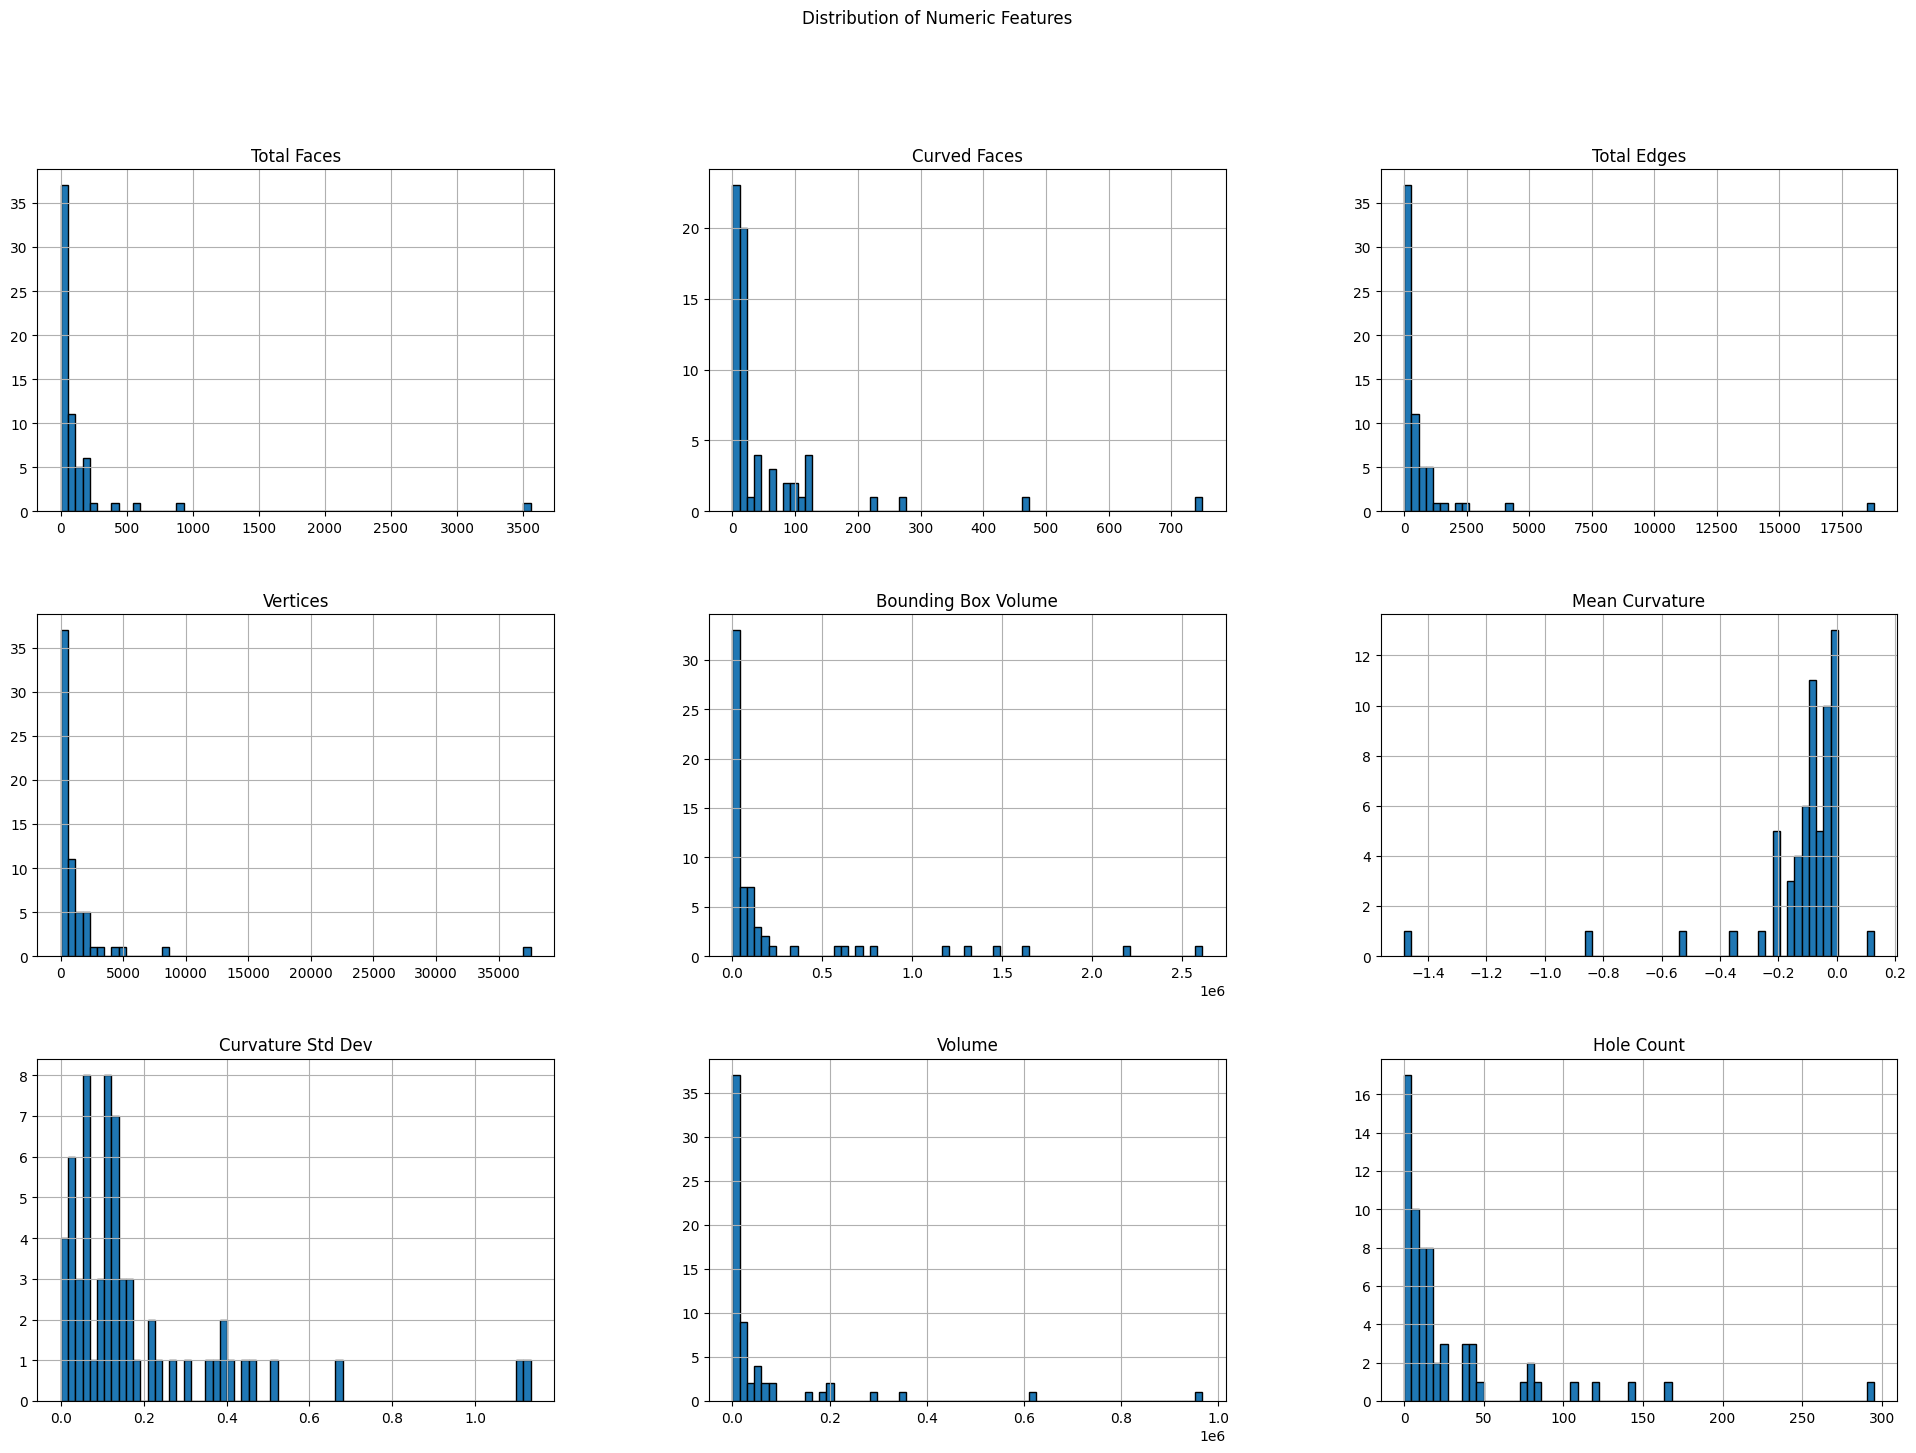

In [6]:
numeric_columns = ['Total Faces', 'Curved Faces', 'Total Edges', 'Vertices', 'Bounding Box Volume', 
                   'Mean Curvature', 'Curvature Std Dev', 'Volume', 'Hole Count']

df[numeric_columns].hist(bins=65, figsize=(24, 16), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

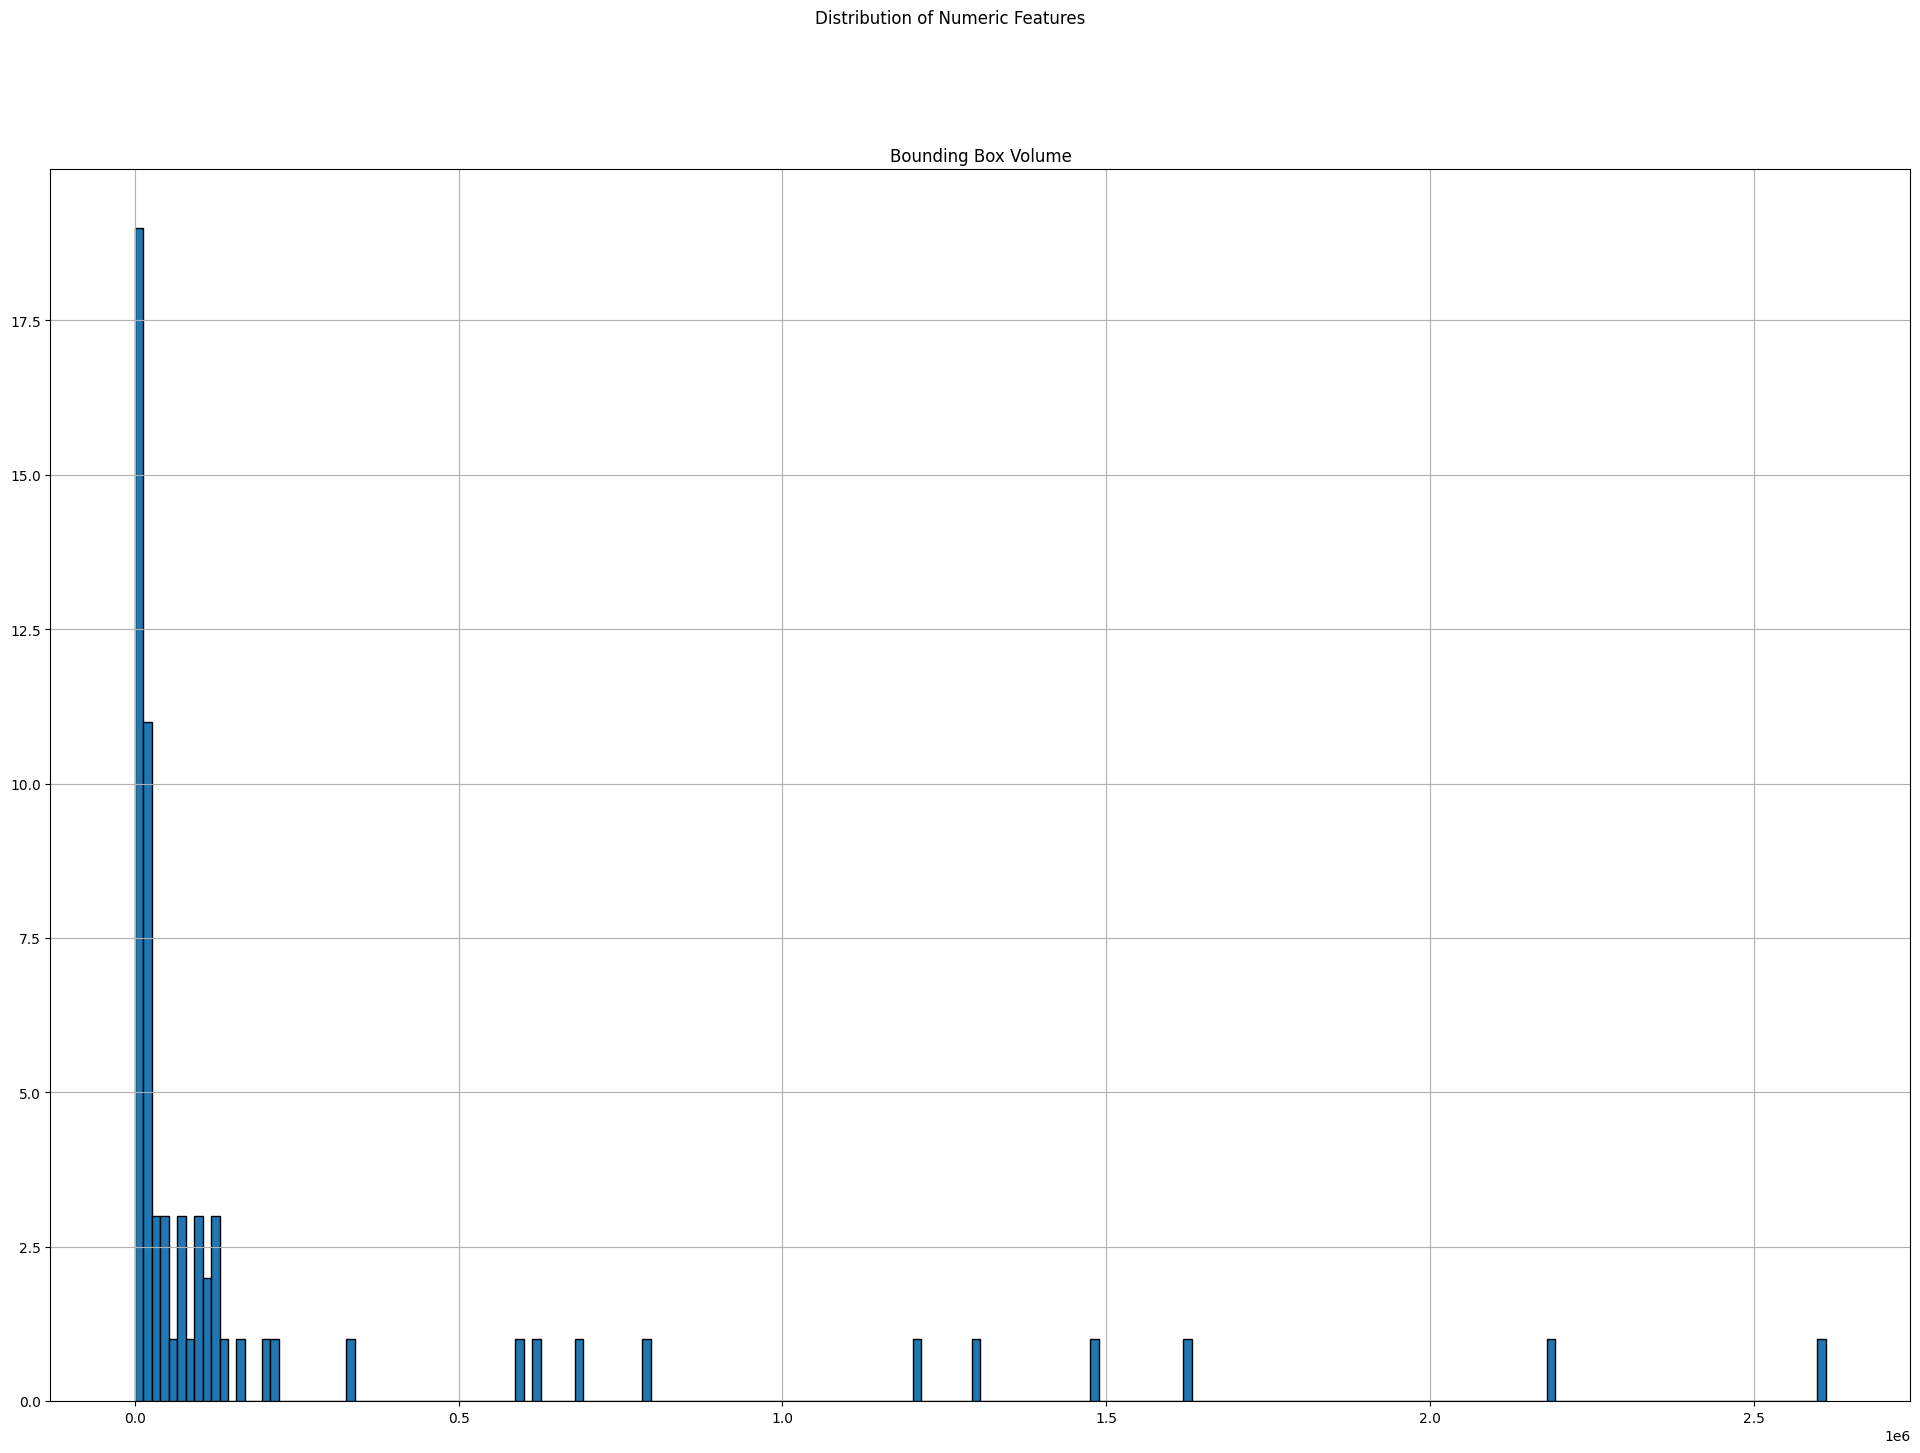

In [7]:
numeric_columns = ['Bounding Box Volume']

df[numeric_columns].hist(bins=200, figsize=(24, 16), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

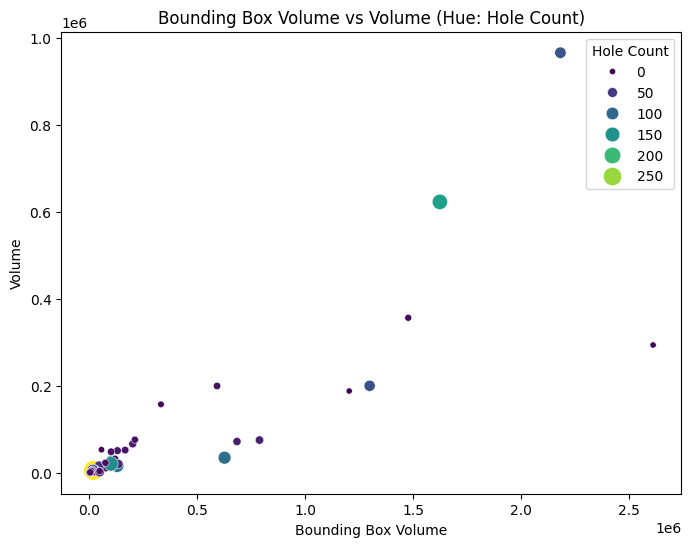

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bounding Box Volume', y='Volume', data=df, hue='Hole Count', palette='viridis', size='Hole Count', sizes=(20, 200))
plt.title('Bounding Box Volume vs Volume (Hue: Hole Count)')
plt.xlabel('Bounding Box Volume')
plt.ylabel('Volume')
plt.legend(title='Hole Count')
plt.show()

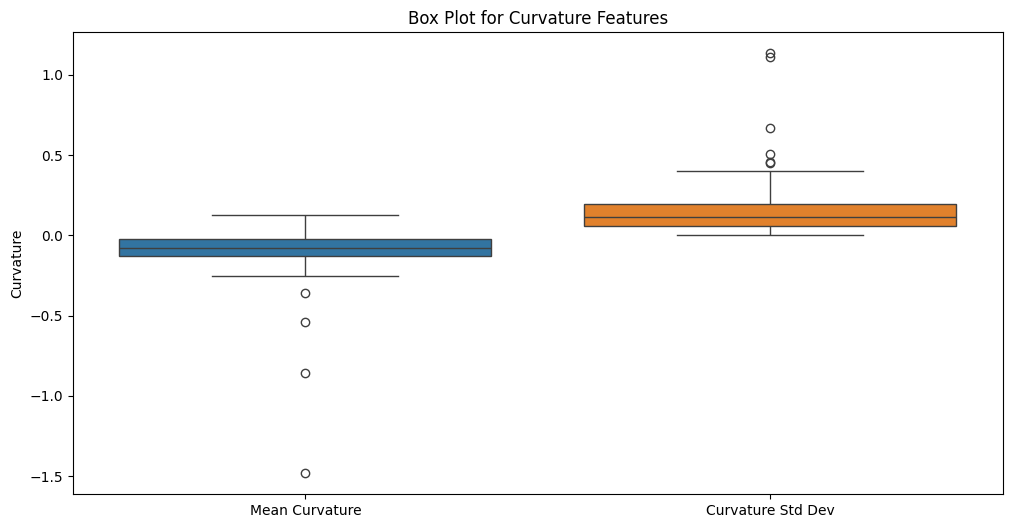

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Mean Curvature', 'Curvature Std Dev']])
plt.title('Box Plot for Curvature Features')
plt.ylabel('Curvature')
plt.show()